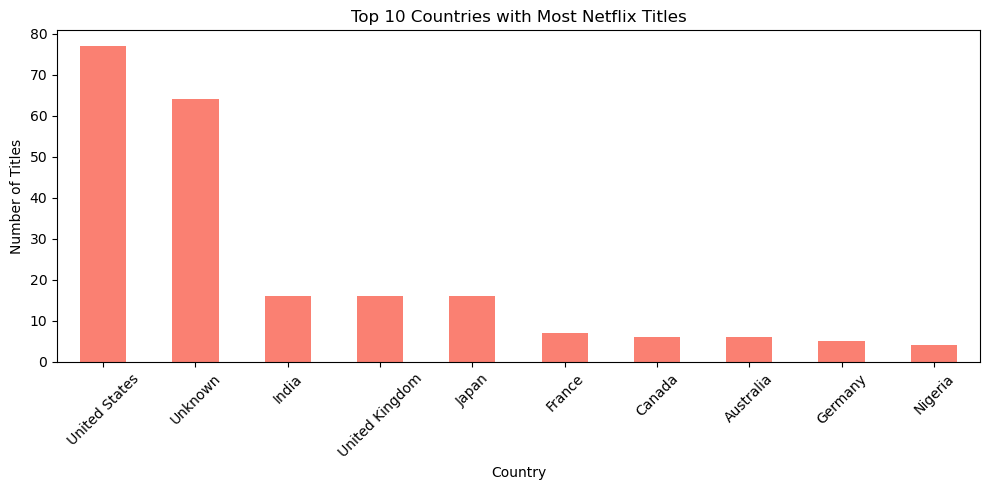

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your Netflix dataset
df = pd.read_csv("Netflix(1).csv")

# 2. Clean and handle missing countries
df['country'] = df['country'].fillna('Unknown')

# 3. Split countries (some rows have multiple, like "India, US")
country_counts = df['country'].str.split(', ', expand=True).stack().value_counts().head(10)

# 4. Plot the Top 10 countries
country_counts.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [18]:
# 5. Unique Twist: Most common genre in top 10 countries
top_countries = country_counts.index.tolist()

print("\n Most Frequent Genre in Top 10 Countries:\n")
for country in top_countries:
    subset = df[df['country'].str.contains(country, na=False)]
    top_genre = subset['listed_in'].str.split(', ').explode().value_counts().idxmax()
    print(f"{country}: {top_genre}")



 Most Frequent Genre in Top 10 Countries:

United States: Comedies
Unknown: International TV Shows
India: International Movies
United Kingdom: Dramas
Japan: Action & Adventure
France: Thrillers
Canada: Action & Adventure
Australia: Kids' TV
Germany: Dramas
Nigeria: International TV Shows


In [24]:
# 6. Count how many times specific genres appear
target_genres = ['Comedy', 'Drama', 'Romance', 'Violence']
genre_counts = {}

for genre in target_genres:
    count = df['listed_in'].str.contains(genre, case=False, na=False).sum()
    genre_counts[genre] = count

# Print genre counts
print("\n Total Number of Titles by Genre:")
for genre, count in genre_counts.items():
    print(f"{genre}: {count} titles")



 Total Number of Titles by Genre:
Comedy: 0 titles
Drama: 61 titles
Romance: 0 titles
Violence: 0 titles


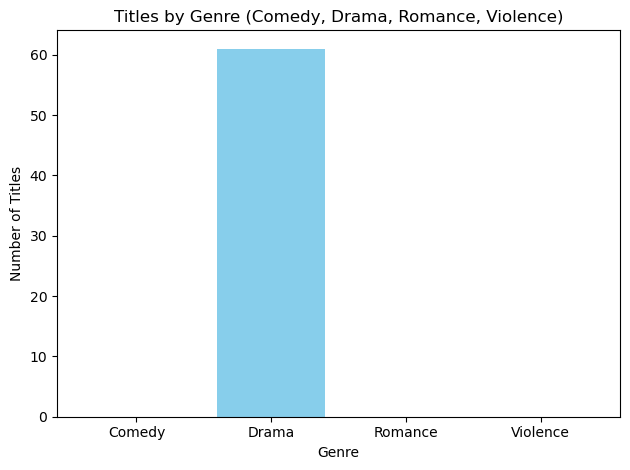

In [22]:
import matplotlib.pyplot as plt

plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title("Titles by Genre (Comedy, Drama, Romance, Violence)")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()
